In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

'%.3f'

### 讀入心臟病的CSV資料

In [2]:
heart_disease = pd.read_csv('heart_disease.csv')

### 顯示前10筆資料

In [3]:
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### 顯示欄位資訊

In [4]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


欄位說明：
1. age - age in years
2. sex -（1 =男性； 0 =女性）
3. cp - -胸痛型別（0: 典型的心絞痛：與胸痛有關，減少心臟的血液供應1: 非心絞痛：通常為食道痙攣（與心臟無關）2: 非心絞痛：通常為食道痙攣（與  心臟無關）3: 無症狀：胸痛未顯示疾病跡象）
4. trestbps - 靜息血壓（入院時以毫米汞柱為單位）高於130-140的情況通常令人擔憂
5. chol - 血清膽汁，mg / dl
    血清= LDL + HDL + 0.2 *甘油三酸酯
    200以上值得關注
6. fbs-（空腹血糖> 120 mg / dl）（1 =正確; 0 =錯誤）
    '> 126’mg / dL表示糖尿病
7. restecg --靜息心電圖結果
    0：沒什麼可注意的
    1：ST-T波異常
    範圍從輕度症狀到嚴重問題
    表示心跳不正常
    2:可能或確定的左心室肥大
    擴大心臟的主泵室
8. 丘腦-達到最大心率
9. exang - 運動誘發的心絞痛（1 =是; 0 =否）
10. oldpeak - 運動引起的相對於休息的ST抑鬱會在運動不健康的心臟時觀察心臟的壓力，這會增加壓力
11. slope - 最高運動ST段的坡度
    0: Upsloping: 鍛鍊可提高心率（罕見）
    1: Flatsloping: 變化很小（典型的健康心臟）
    2: Downslopins:心臟不健康的體徵
12. ca - 螢光顯色的主要血管數目（0-3）
    彩色血管意味著醫生可以看到血液通過
    血液運動越多越好（無凝塊）
13. thal - al-lium應力結果
    1,3:正常
    6: 修復缺陷：曾經是缺陷，但是現在可以了
    7: 可逆缺陷：鍛鍊時沒有適當的血液運動
14. target - 是否患有疾病（1 =是，0 =否）（=預測屬性）

In [5]:
#檢查是否有空值
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#查看年齡的前10筆資料
heart_disease['sex'].head()

0    1
1    1
2    0
3    1
4    0
Name: sex, dtype: int64

### 男性和女性的trestbps靜息血壓平均值，最大值，最小值

In [10]:
heart_disease.groupby('sex')['trestbps'].mean()

sex
0    133.083333
1    130.946860
Name: trestbps, dtype: float64

In [11]:
heart_disease.groupby('sex')['trestbps'].max()

sex
0    200
1    192
Name: trestbps, dtype: int64

In [12]:
heart_disease.groupby('sex')['trestbps'].min()

sex
0    94
1    94
Name: trestbps, dtype: int64

### 男性和女性的chol血清膽汁平均值，最大值，最小值。(200以上值得關注)

In [13]:
heart_disease.groupby('sex')['chol'].mean()

sex
0    261.302083
1    239.289855
Name: chol, dtype: float64

In [14]:
heart_disease.groupby('sex')['chol'].max()

sex
0    564
1    353
Name: chol, dtype: int64

In [15]:
heart_disease.groupby('sex')['chol'].min()

sex
0    141
1    126
Name: chol, dtype: int64

In [33]:
test = heart_disease.groupby('age')
test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

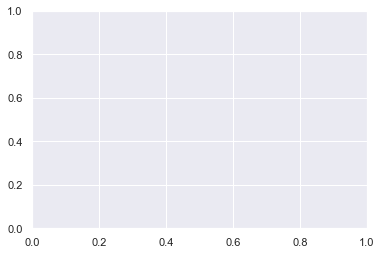

In [35]:
plt.hist(test['trestbps'])
plt.xlabel('trestbps')
plt.ylabel('Count')
plt.grid(True)

### 利用長條圖顯示不同血壓值的人數

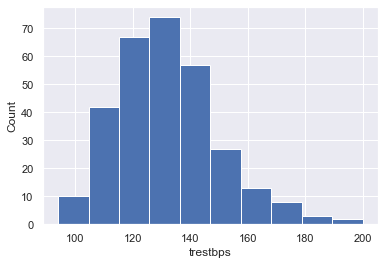

In [26]:
plt.hist(heart_disease['trestbps'])
plt.xlabel('trestbps')
plt.ylabel('Count')
plt.grid(True)

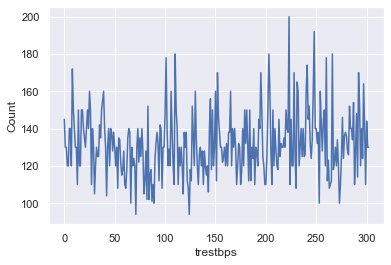

In [16]:
plt.plot(heart_disease['trestbps'])
plt.xlabel('trestbps')
plt.ylabel('Count')
plt.grid(True)

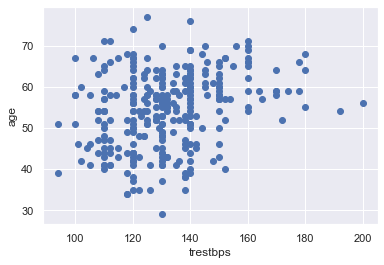

In [5]:
plt.scatter(heart_disease['trestbps'],heart_disease['age'])
plt.xlabel('trestbps')
plt.ylabel('age')
plt.grid(True)